# TPC PID Performance

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16

from readdata import get_data
from tpcplot import draw_g4xyz
from tracklen import process_track, plot_dedx
from recoclusters import digits_to_clusters, pixid2position

In [2]:
data_path = 'tracks'

In [3]:
import glob

In [4]:
def get_keys(files):
    return [os.path.splitext(os.path.split(item)[-1])[0] for item in files]

In [5]:
files = sorted(glob.glob(f'{data_path}/*.npy'))
keys = get_keys(files)
data = {key: fname for key, fname in zip(keys, files)}
', '.join(data.keys())

'K_100.0, K_150.0, K_1500.0, K_200.0, K_250.0, K_300.0, K_400.0, K_500.0, K_600.0, e_100.0, e_150.0, e_1500.0, e_200.0, e_250.0, e_300.0, e_400.0, e_500.0, e_600.0, mu_100.0, mu_150.0, mu_1500.0, mu_200.0, mu_250.0, mu_300.0, mu_400.0, mu_500.0, mu_600.0, p_1500.0, p_250.0, p_300.0, p_400.0, p_500.0, p_600.0, pi_100.0, pi_150.0, pi_1500.0, pi_200.0, pi_250.0, pi_300.0, pi_400.0, pi_500.0, pi_600.0'

In [6]:
def dedx_plot(ds, label):
    fig, ax = plt.subplots(figsize=(14, 4.5), ncols=3)
    xlabels = ['Track length (mm)', 'dEdx (keV / mm)', 'Track length (mm)']
    for i, (a, lbl) in enumerate(zip(ax, xlabels)):
        if i < 2:
            a.hist(ds[:, i+1], bins=40, histtype='step')
        else:
            a.scatter(ds[:, 1], ds[:, 2], s=0.4)
            a.set_ylabel('dEdx (keV / mm)')
        a.set_xlabel(lbl, fontsize=18)
        a.minorticks_on()
        a.grid(which='major')
        a.grid(which='minor', linestyle=':')
    fig.tight_layout()
    plt.savefig(f'plots/tracks_{label}.png')

In [7]:
trkfilter = {}

In [8]:
def plot_after_filter(ds, cuts, label):
    (llo, lhi), (elo, ehi) = cuts
    ds = ds[(ds[:, 1] < lhi) & (ds[:, 1] > llo) & (ds[:, 2] < ehi) & (ds[:, 2] > elo)]
    print(f'{ds.shape[0]}, {ds[:, 2].mean():.3f}')
    dedx_plot(ds, label)
    return ds

## Muons

9035, 0.388


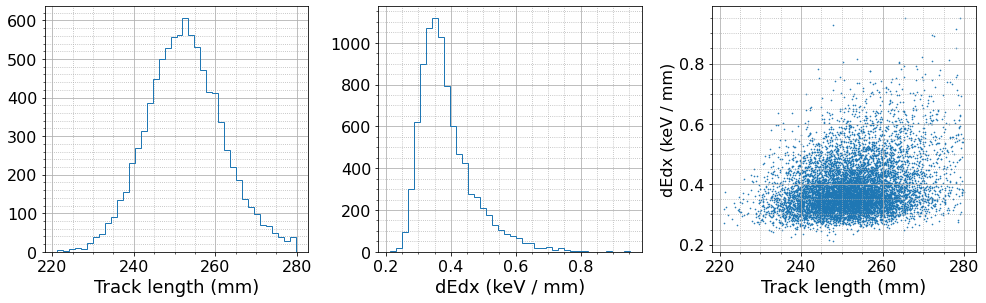

In [9]:
key = 'mu_100.0'
trkfilter[key] = ((220., 280.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9288, 0.282


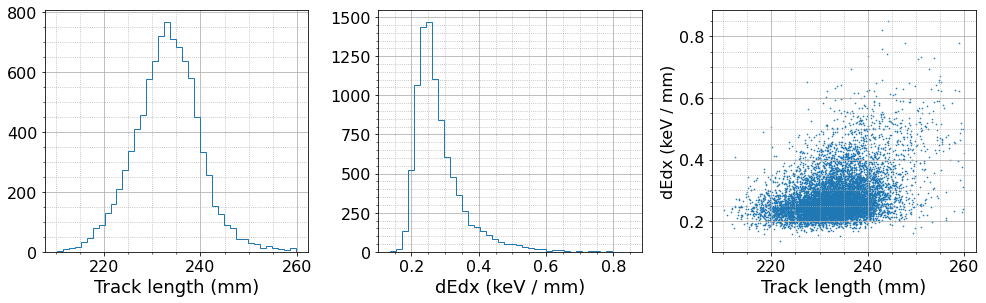

In [10]:
key = 'mu_150.0'
trkfilter[key] = ((210., 260.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9259, 0.250


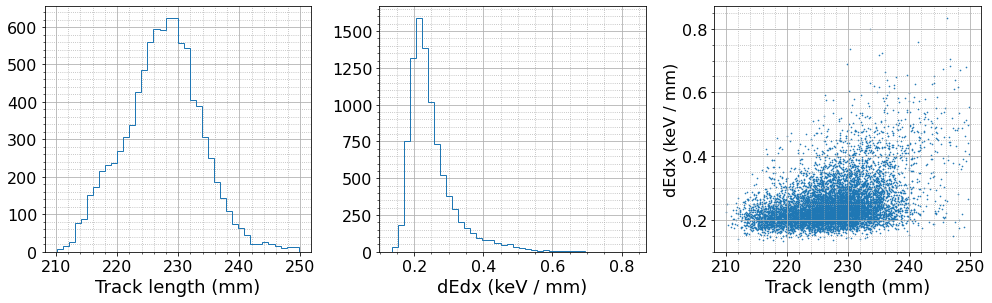

In [11]:
key = 'mu_200.0'
trkfilter[key] = ((210., 250.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9056, 0.235


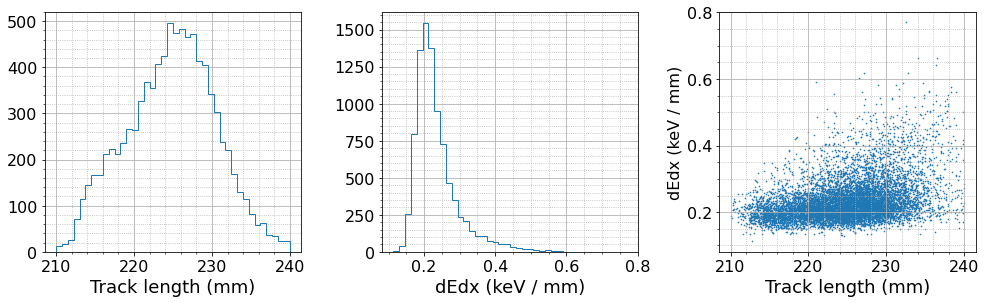

In [12]:
key = 'mu_250.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9026, 0.229


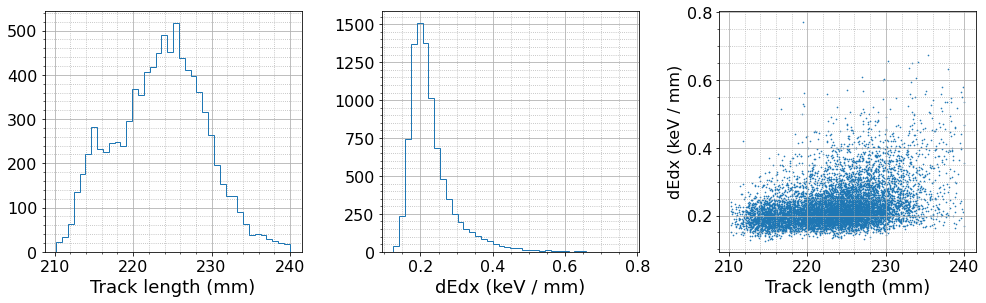

In [13]:
key = 'mu_300.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8942, 0.227


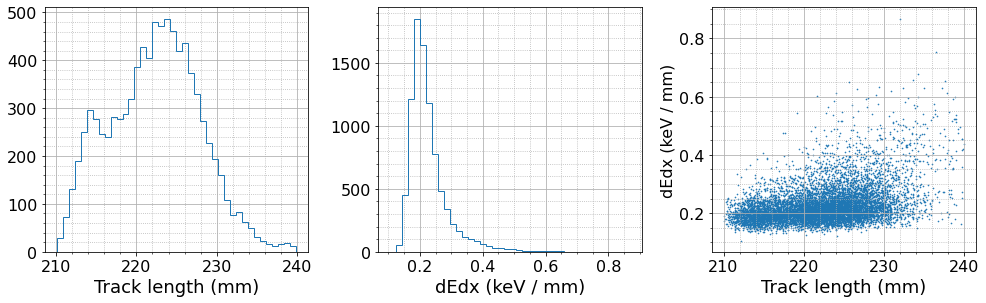

In [14]:
key = 'mu_400.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8897, 0.227


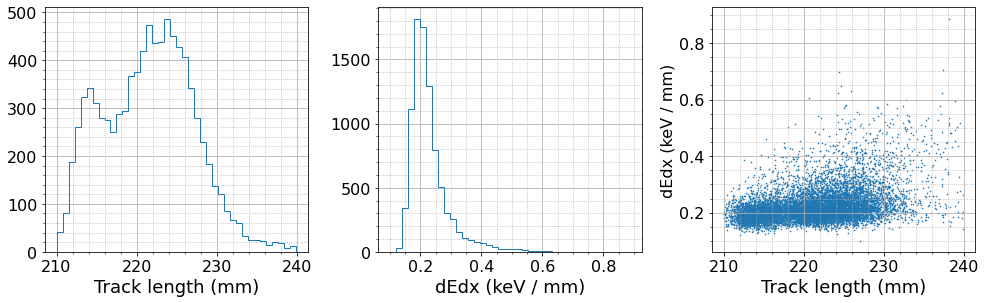

In [15]:
key = 'mu_500.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8831, 0.230


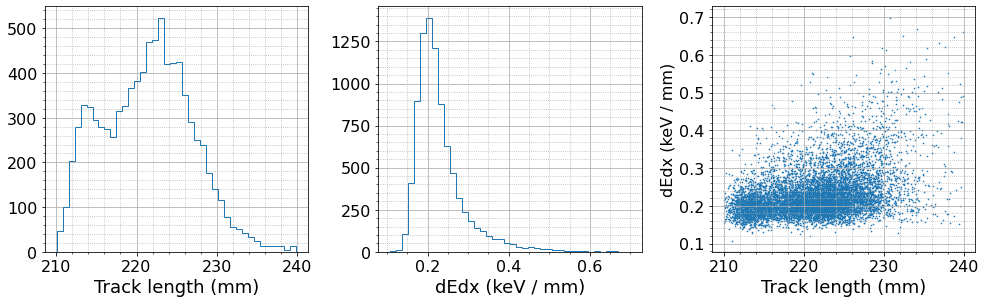

In [16]:
key = 'mu_600.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8835, 0.248


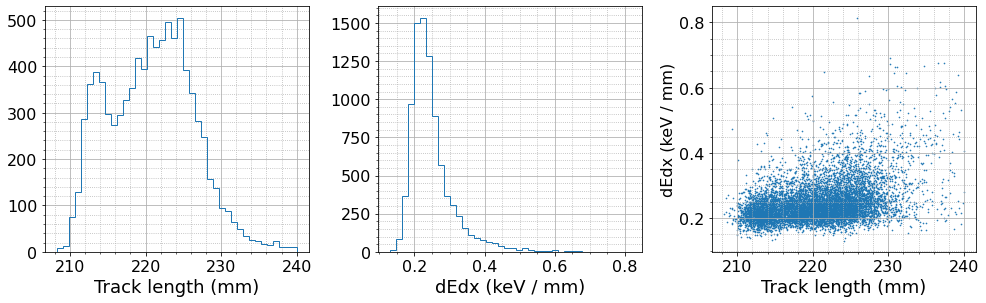

In [17]:
key = 'mu_1500.0'
trkfilter[key] = ((207., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

What are the two peaks in the track length???

## Pions

7717, 0.540


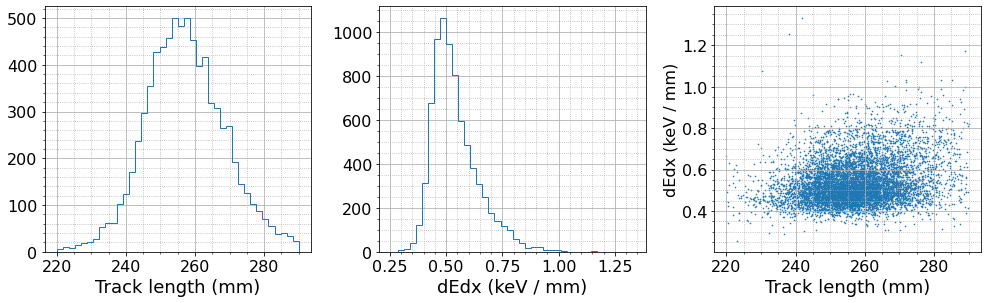

In [18]:
key = 'pi_100.0'
trkfilter[key] = ((220., 290.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8628, 0.339


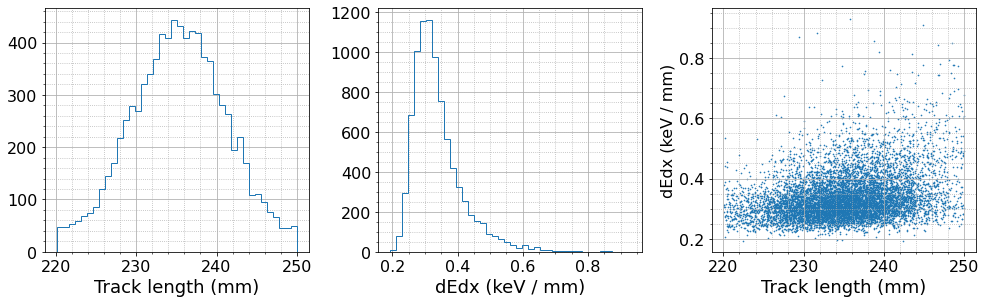

In [19]:
key = 'pi_150.0'
trkfilter[key] = ((220., 250.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8843, 0.277


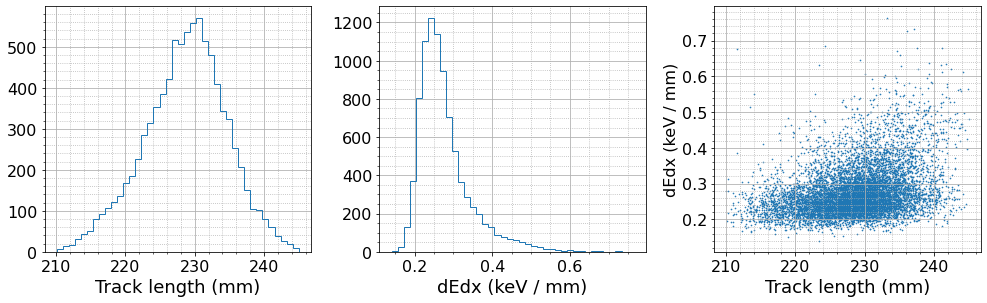

In [20]:
key = 'pi_200.0'
trkfilter[key] = ((210., 245.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8809, 0.255


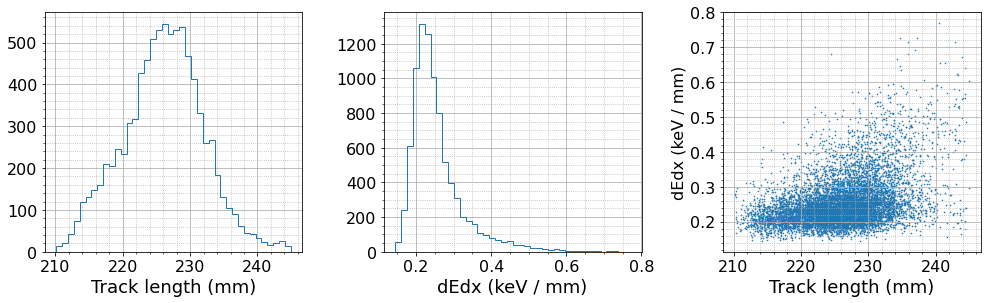

In [21]:
key = 'pi_250.0'
trkfilter[key] = ((210., 245.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8809, 0.240


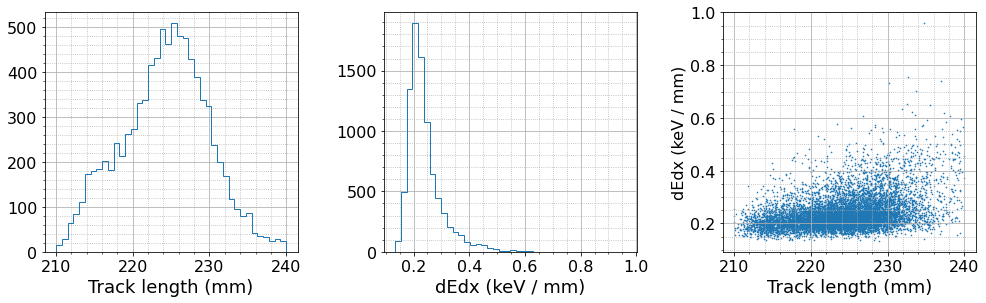

In [22]:
key = 'pi_300.0'
trkfilter[key] = ((210., 240.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8646, 0.228


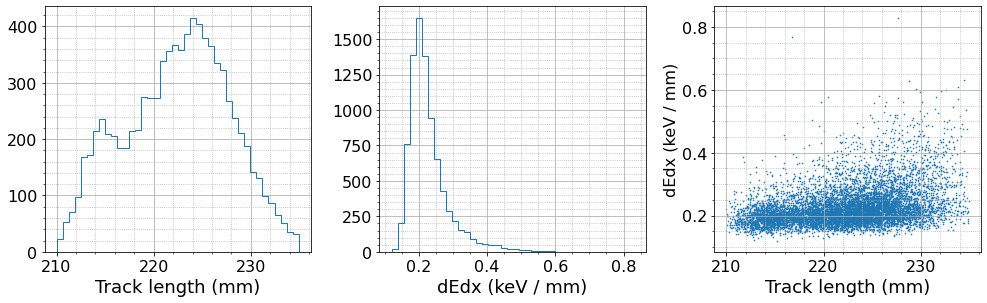

In [23]:
key = 'pi_400.0'
trkfilter[key] = ((210., 235.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8682, 0.226


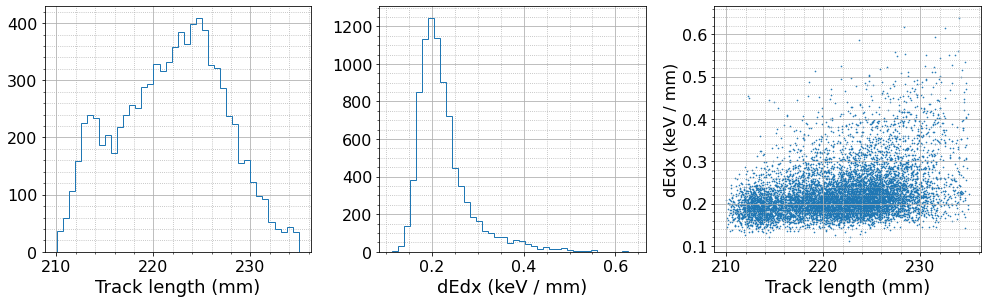

In [24]:
key = 'pi_500.0'
trkfilter[key] = ((210., 235.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8691, 0.225


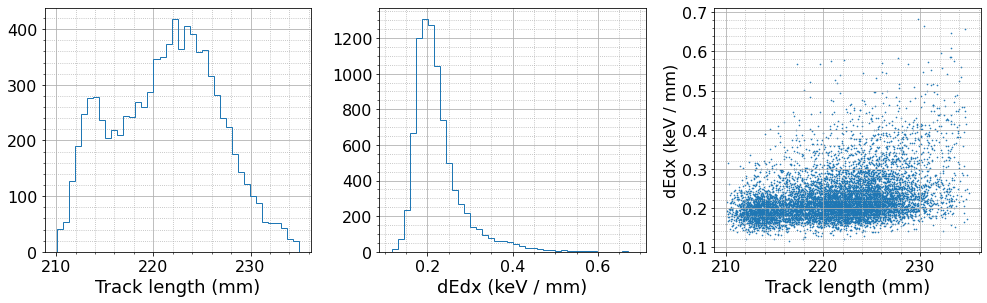

In [25]:
key = 'pi_600.0'
trkfilter[key] = ((210., 235.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8609, 0.242


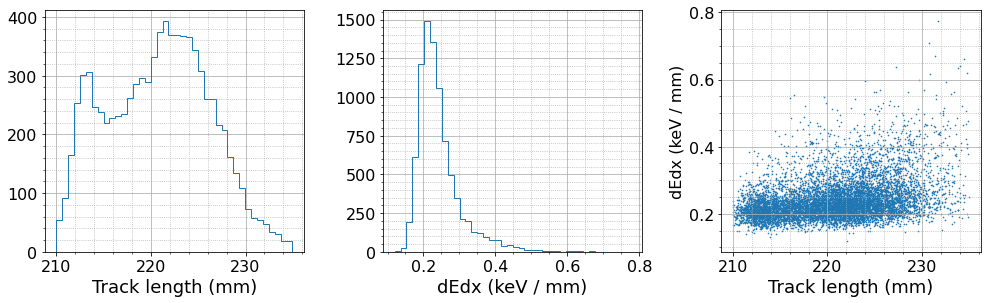

In [26]:
key = 'pi_1500.0'
trkfilter[key] = ((210., 235.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

## Electrons

8675, 0.308


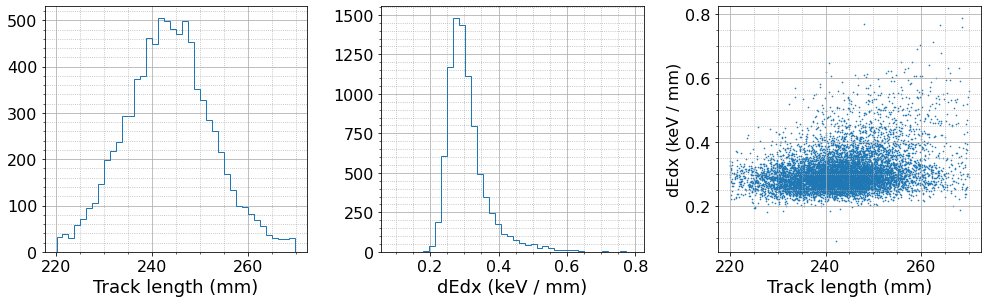

In [27]:
key = 'e_100.0'
trkfilter[key] = ((220., 270.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8617, 0.312


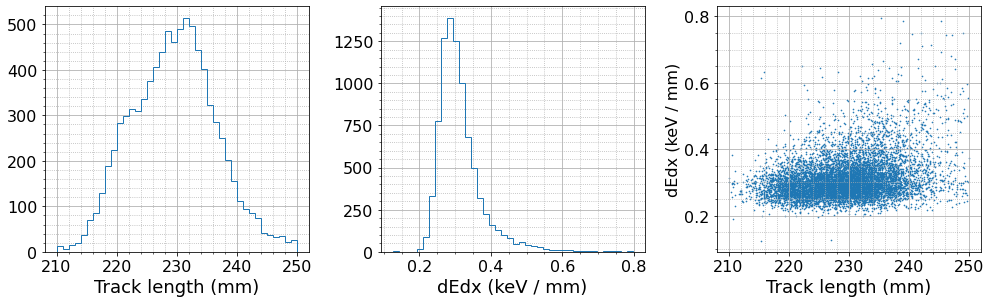

In [28]:
key = 'e_150.0'
trkfilter[key] = ((210., 250.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8709, 0.315


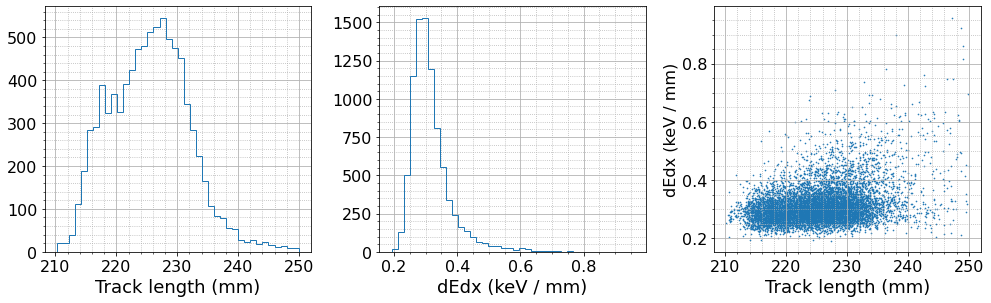

In [29]:
key = 'e_200.0'
trkfilter[key] = ((210., 250.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8655, 0.316


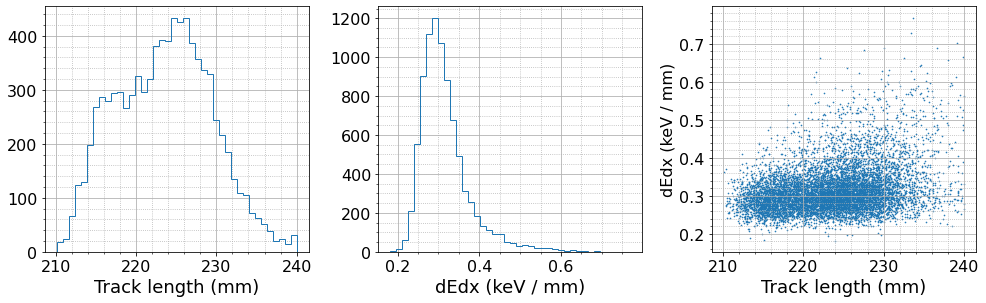

In [30]:
key = 'e_250.0'
trkfilter[key] = ((210., 240.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8615, 0.318


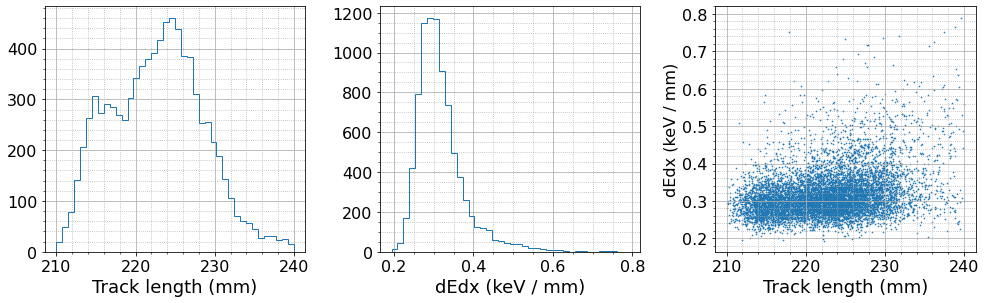

In [31]:
key = 'e_300.0'
trkfilter[key] = ((210., 240.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8528, 0.318


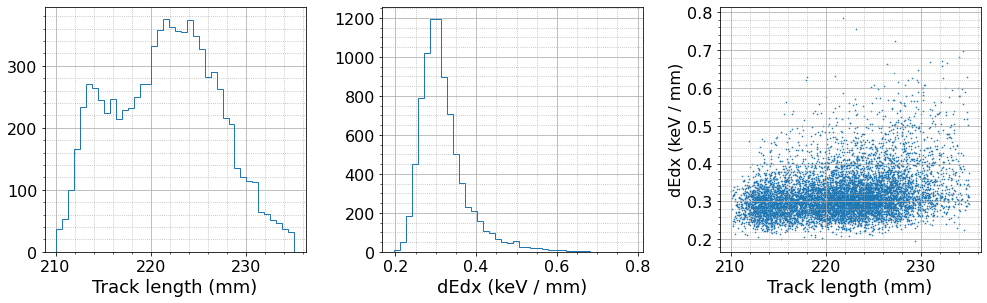

In [32]:
key = 'e_400.0'
trkfilter[key] = ((210., 235.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8586, 0.319


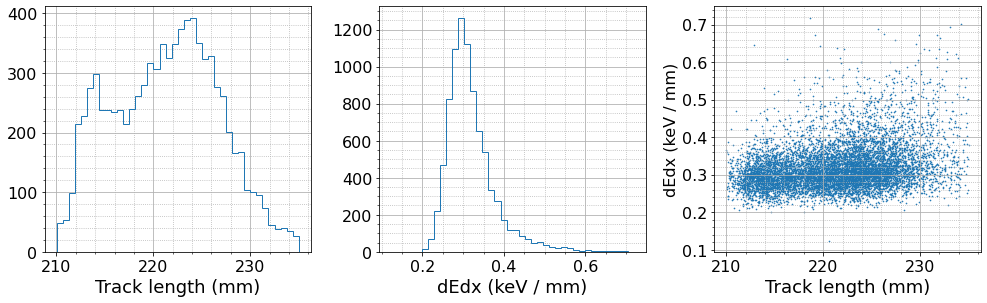

In [33]:
key = 'e_500.0'
trkfilter[key] = ((210., 235.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8600, 0.320


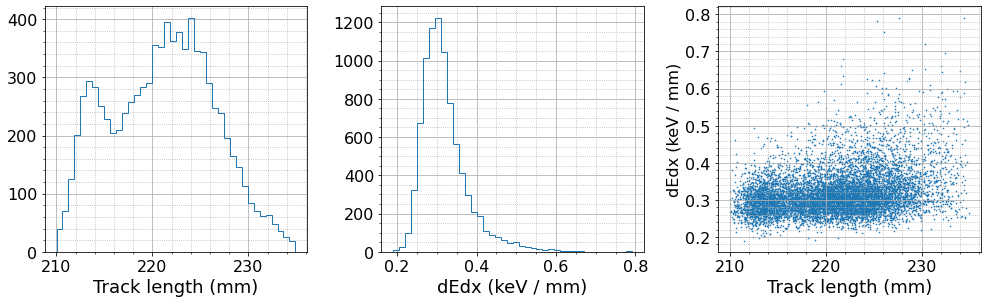

In [34]:
key = 'e_600.0'
trkfilter[key] = ((210., 235.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8722, 0.322


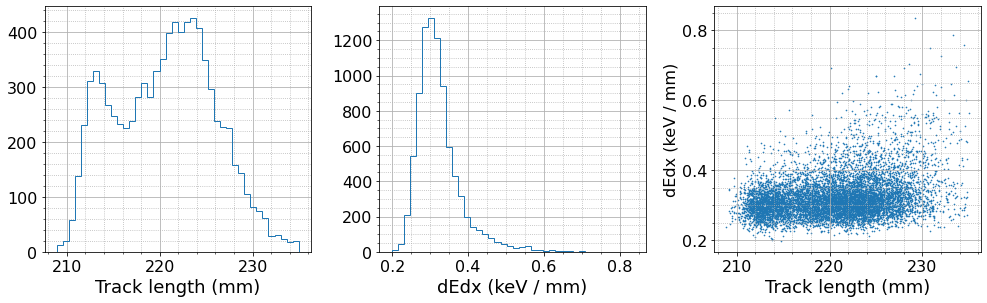

In [35]:
key = 'e_1500.0'
trkfilter[key] = ((205., 235.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

## Kaons

2277, 5.154


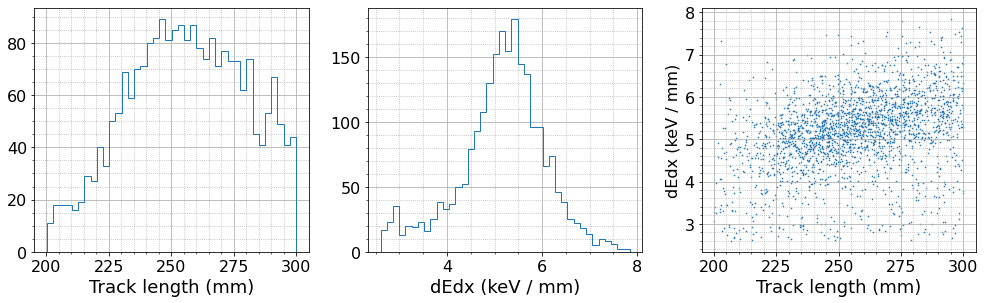

In [36]:
key = 'K_150.0'
trkfilter[key] = ((200., 300.), (2.6, 8.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

6054, 1.319


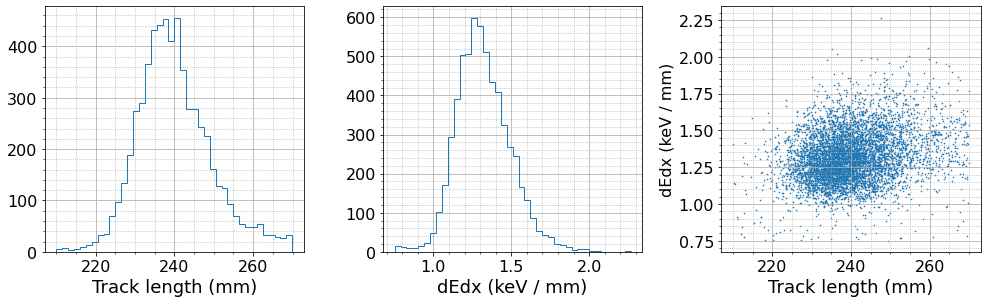

In [37]:
key = 'K_200.0'
trkfilter[key] = ((210., 270.), (0.75, 3.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

6789, 0.832


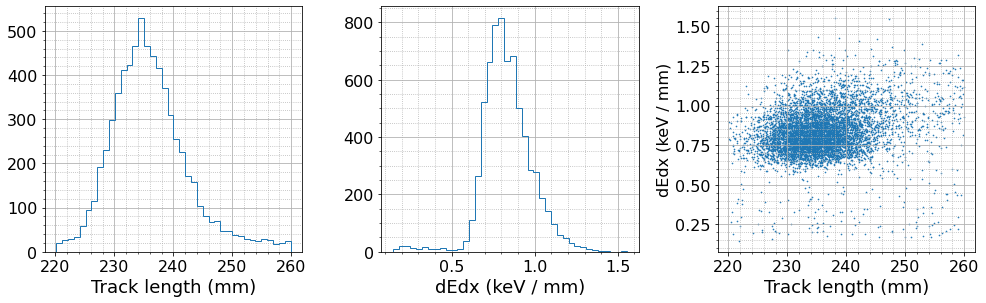

In [38]:
key = 'K_250.0'
trkfilter[key] = ((220., 260.), (0., 3.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

7208, 0.627


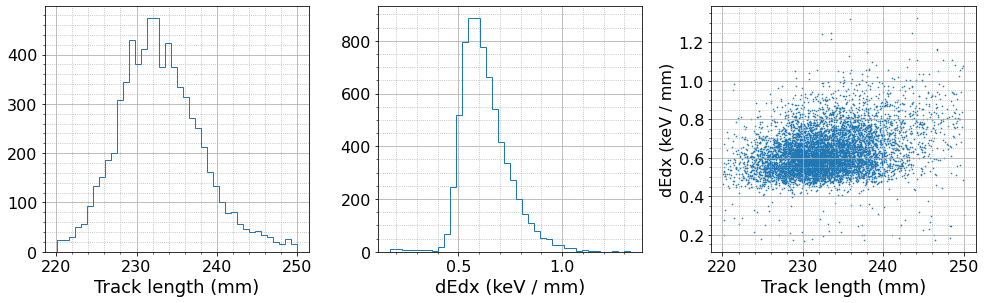

In [39]:
key = 'K_300.0'
trkfilter[key] = ((220., 250.), (0., 3.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8046, 0.437


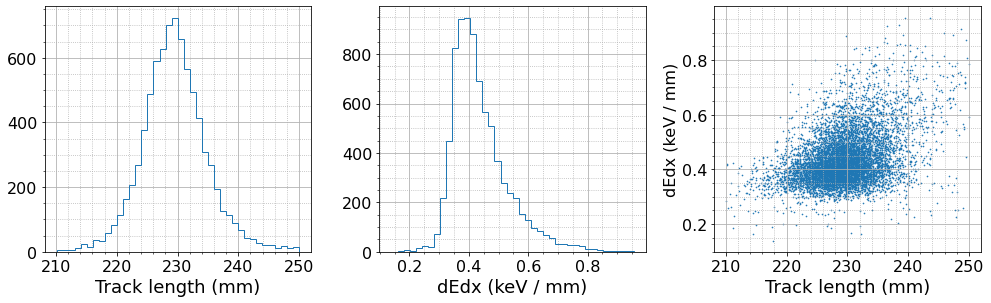

In [40]:
key = 'K_400.0'
trkfilter[key] = ((210., 250.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8485, 0.354


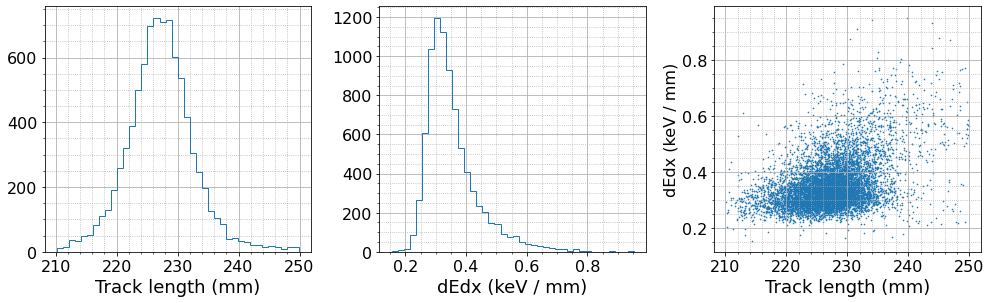

In [41]:
key = 'K_500.0'
trkfilter[key] = ((210., 250.), (0., 1.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8666, 0.306


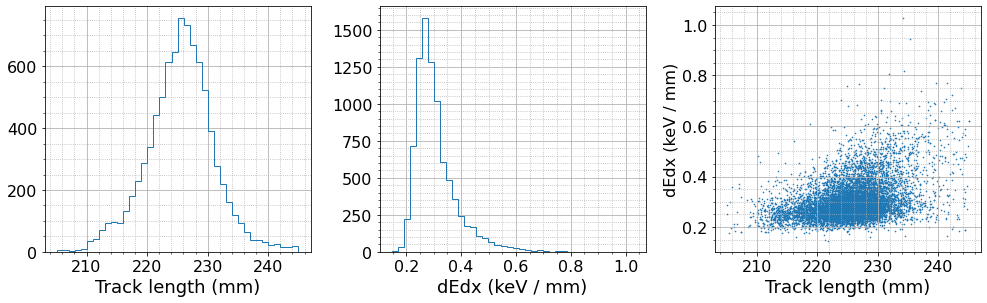

In [42]:
key = 'K_600.0'
trkfilter[key] = ((205., 245.), (0., 3.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8828, 0.228


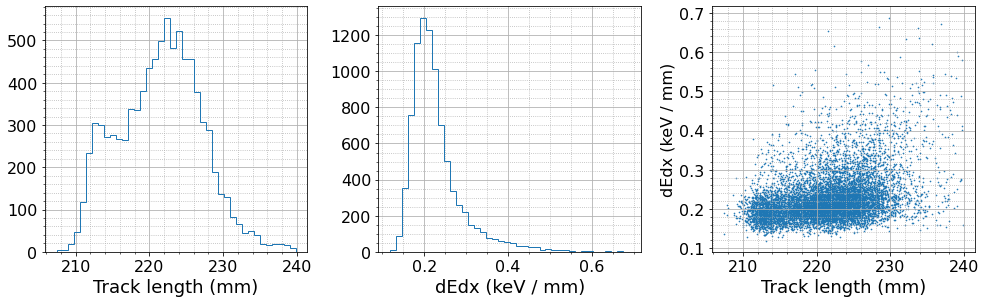

In [43]:
key = 'K_1500.0'
trkfilter[key] = ((207., 240.), (0., 0.8))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

## Protons

9306, 4.277


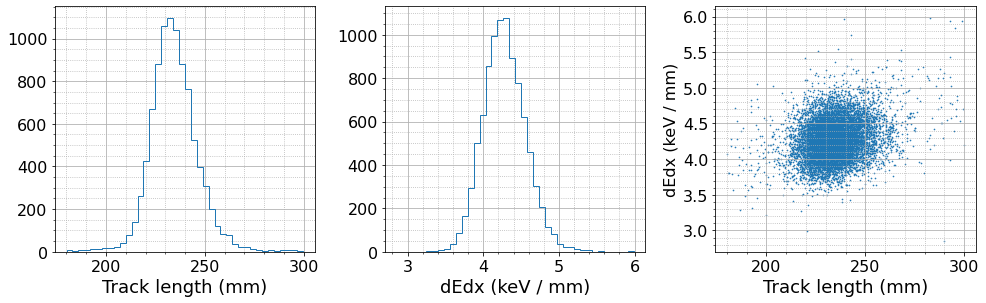

In [44]:
key = 'p_250.0'
trkfilter[key] = ((180., 300.), (0., 6.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9291, 2.048


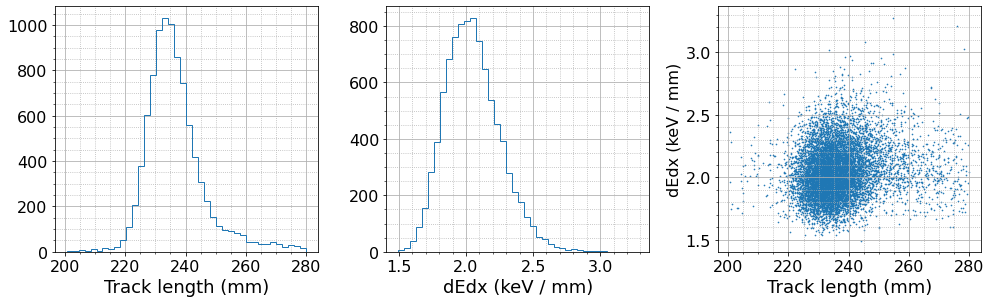

In [45]:
key = 'p_300.0'
trkfilter[key] = ((200., 280.), (0., 3.5))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8460, 1.092


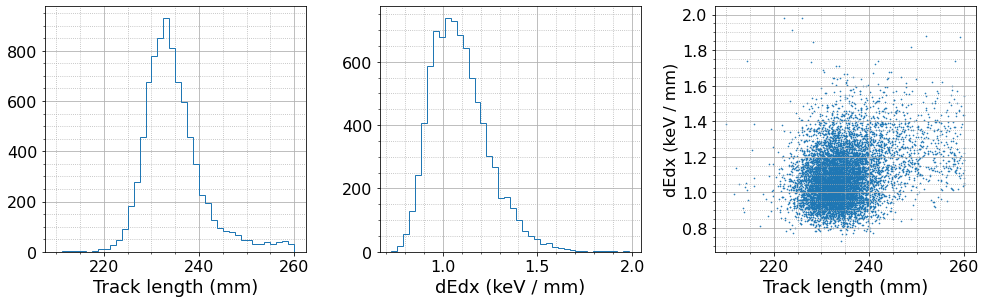

In [46]:
key = 'p_400.0'
trkfilter[key] = ((210., 260.), (0., 2.))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8530, 0.752


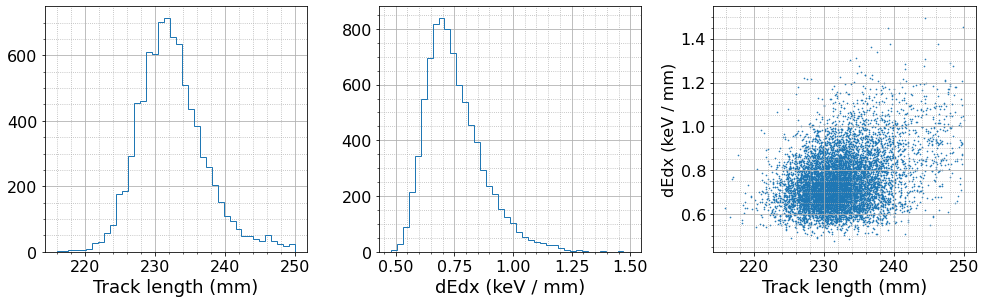

In [47]:
key = 'p_500.0'
trkfilter[key] = ((215., 250.), (0., 1.5))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

8758, 0.580


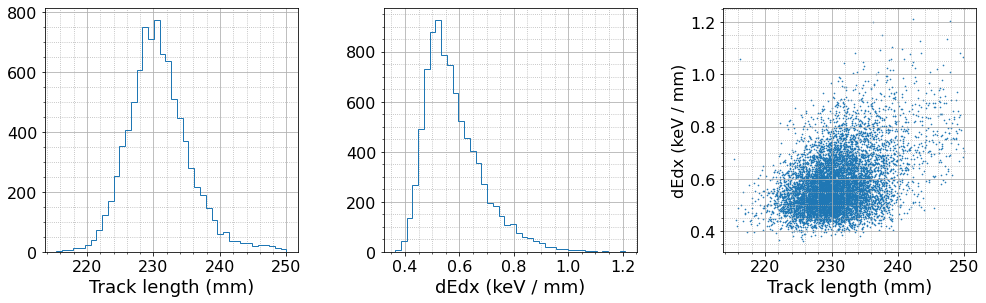

In [48]:
key = 'p_600.0'
trkfilter[key] = ((215., 250.), (0., 1.5))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

9246, 0.266


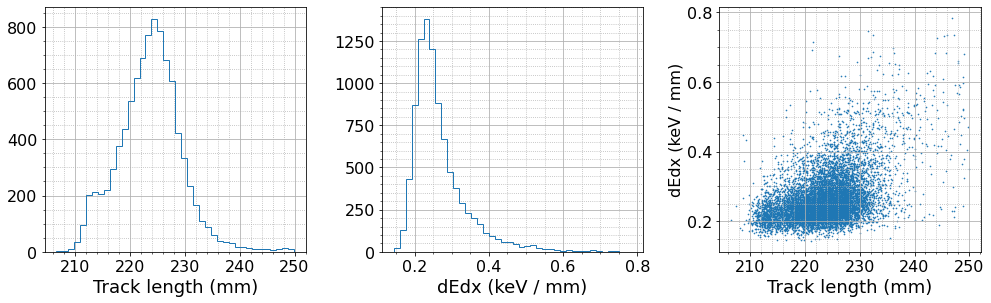

In [49]:
key = 'p_1500.0'
trkfilter[key] = ((206., 250.), (0., 1.0))
plot_after_filter(np.load(data[key]), trkfilter[key], key);

In [50]:
ds0 = np.load(data['p_1500.0'])
mask = np.where((ds0[:, 1] > 199) & (ds0[:, 1] < 200))[0]
mask[:5]

array([  93,  155,  812, 1030, 1775])

In [51]:
trkfilter

{'mu_100.0': ((220.0, 280.0), (0.0, 2.0)),
 'mu_150.0': ((210.0, 260.0), (0.0, 2.0)),
 'mu_200.0': ((210.0, 250.0), (0.0, 2.0)),
 'mu_250.0': ((210.0, 240.0), (0.0, 2.0)),
 'mu_300.0': ((210.0, 240.0), (0.0, 2.0)),
 'mu_400.0': ((210.0, 240.0), (0.0, 2.0)),
 'mu_500.0': ((210.0, 240.0), (0.0, 2.0)),
 'mu_600.0': ((210.0, 240.0), (0.0, 2.0)),
 'mu_1500.0': ((207.0, 240.0), (0.0, 2.0)),
 'pi_100.0': ((220.0, 290.0), (0.0, 2.0)),
 'pi_150.0': ((220.0, 250.0), (0.0, 1.0)),
 'pi_200.0': ((210.0, 245.0), (0.0, 1.0)),
 'pi_250.0': ((210.0, 245.0), (0.0, 1.0)),
 'pi_300.0': ((210.0, 240.0), (0.0, 1.0)),
 'pi_400.0': ((210.0, 235.0), (0.0, 1.0)),
 'pi_500.0': ((210.0, 235.0), (0.0, 2.0)),
 'pi_600.0': ((210.0, 235.0), (0.0, 2.0)),
 'pi_1500.0': ((210.0, 235.0), (0.0, 2.0)),
 'e_100.0': ((220.0, 270.0), (0.0, 0.8)),
 'e_150.0': ((210.0, 250.0), (0.0, 0.8)),
 'e_200.0': ((210.0, 250.0), (0.0, 2.0)),
 'e_250.0': ((210.0, 240.0), (0.0, 2.0)),
 'e_300.0': ((210.0, 240.0), (0.0, 0.8)),
 'e_400.0': ((

## Serialize

In [52]:
with open('trkfilter.json', 'w') as ofile:
    json.dump(trkfilter, ofile, indent=4)